## Observations and Insights 

In [29]:
%matplotlib inline

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results)
data.value_counts()

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.
len(data["Mouse ID"].unique())

249

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

data.sort_values(["Mouse ID", "Timepoint"]).value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
a203      Infubinol     Female  20          23          0          45.000000           0                   1
q597      Ramicane      Male    20          25          40         44.471821           2                   1
q633      Zoniferol     Male    12          25          10         49.001866           0                   1
                                                        5          47.183802           0                   1
                                                                                                          ..
i177      Ramicane      Male    10          18          45         33.562402           3                   1
                                                        40         35.557933           2                   1
                        

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 

(data.duplicated()).value_counts()
data[data.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

dataclean = data.loc[data["Mouse ID"]!="g989",:]
(dataclean.duplicated()).value_counts()

False    1880
Name: count, dtype: int64

In [35]:
# Checking the number of mice in the clean DataFrame.

len(dataclean["Mouse ID"].unique())

248

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = dataclean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = dataclean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = dataclean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
SD = dataclean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = dataclean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summarytable = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": SD, "Standard Error of the Mean": SEM})
summarytable

summarytable["Mean"] = summarytable["Mean"].map("{:,.2f}".format)
summarytable["Median"] = summarytable["Median"].map("{:,.2f}".format)
summarytable["Variance"] = summarytable["Variance"].map("{:,.2f}".format)
summarytable["Standard Deviation"] = summarytable["Standard Deviation"].map("{:,.2f}".format)
summarytable["Standard Error of the Mean"] = summarytable["Standard Error of the Mean"].map("{:,.2f}".format)
summarytable

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

dataclean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

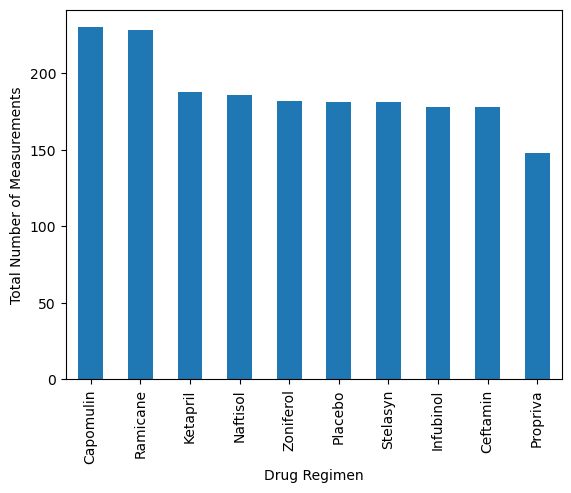

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements = dataclean["Drug Regimen"].value_counts()
measurements.plot(kind="bar")
plt.ylabel("Total Number of Measurements")

plt.show()

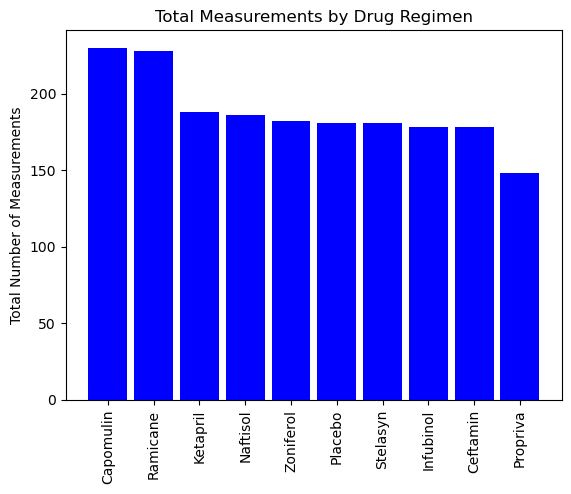

In [39]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(measurements.index.values, measurements.values, color="b", align = "center", alpha = 1, width = .85) 
plt.xticks(rotation="vertical")
plt.ylabel("Total Number of Measurements")
plt.title("Total Measurements by Drug Regimen")
plt.show()

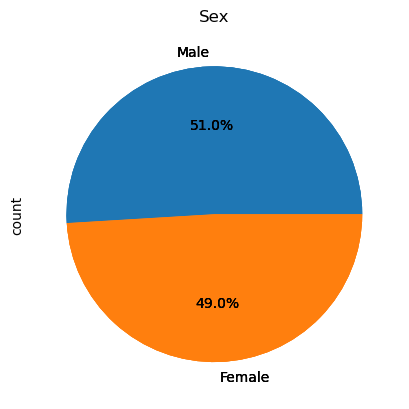

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

dataclean["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.show()

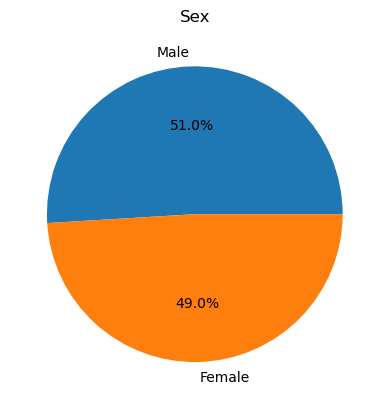

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

dataclean.head()
#sexcounts = dataclean.groupby(dataclean["Mouse ID","Sex"]).size()
sexcounts = dataclean["Sex"].value_counts()
sexcounts

plt.pie(sexcounts.values, labels = sexcounts.index.values, autopct="%1.1f%%")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
dataclean[["Mouse ID", "Drug Regimen"]].head()
#print(dataclean.columns.tolist())


# Start by getting the last (greatest) timepoint for each mouse

finalvolume = dataclean.groupby("Mouse ID")["Timepoint"].max()
finalvolume

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

outcomes = dataclean.merge(finalvolume, on = "Mouse ID", suffixes = ("","_max"))
outcomes["Timepoint_max"].unique()
outcomes = outcomes.loc[outcomes["Timepoint"]==outcomes["Timepoint_max"],:]
outcomes["Mouse ID"].value_counts()

Mouse ID
k403    1
p438    1
o523    1
o562    1
o725    1
       ..
e213    1
e227    1
e291    1
e476    1
z969    1
Name: count, Length: 248, dtype: int64

In [99]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments

# Create empty list to fill with tumor vol data (for plotting)

tumor_ol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatments:
    
    volumes = outcomes.loc[outcomes["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 

    tumor_ol_data.append(volumes)
    
    # Determine outliers using upper and lower bounds

    quartiles = volumes.quantile([.25,.5,.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    iqr = upperquartile - lowerquartile
    lowerbound = lowerquartile - (1.5*iqr)
    upperbound = upperquartile + (1.5*iqr)
    outliers = volumes.loc[(volumes > upperbound) | (volumes < lowerbound)]
    print(f"{drug} Potential Outliers: {outliers}")


    

Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


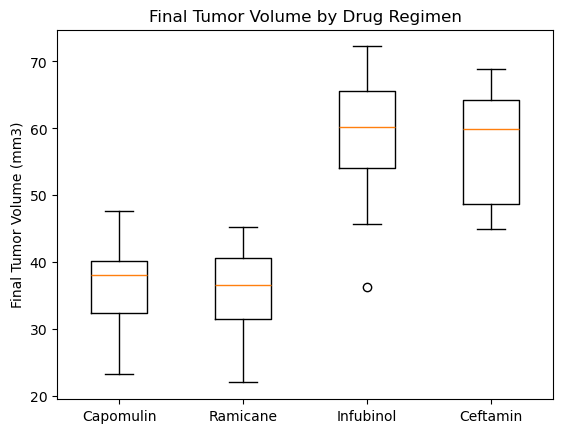

In [106]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_ol_data, tick_labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume by Drug Regimen")
plt.show()


## Line and Scatter Plots

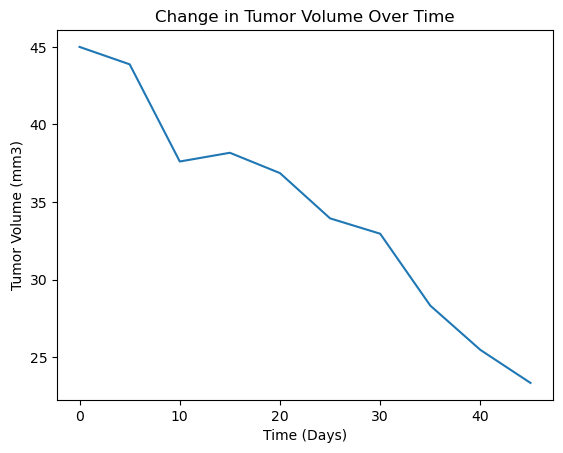

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin = dataclean.loc[dataclean["Drug Regimen"]=="Capomulin",:]
Capomulins185 = Capomulin.loc[Capomulin["Mouse ID"]=="s185",:]
Capomulins185

plt.plot(Capomulins185["Timepoint"],Capomulins185["Tumor Volume (mm3)"])
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Change in Tumor Volume Over Time")
plt.show()

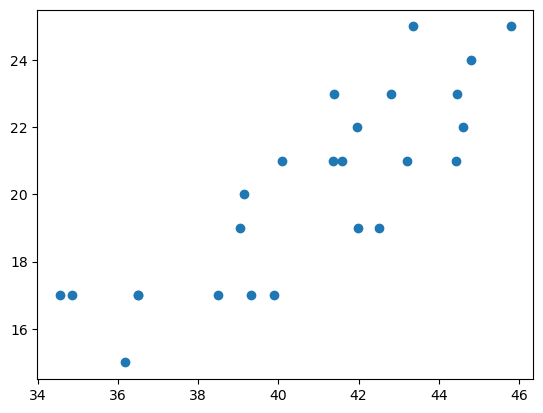

In [126]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
AverageVolume = Capomulin.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean"})
AverageVolume
AverageWeight = Capomulin.groupby("Mouse ID").agg({"Weight (g)": "mean"})

plt.scatter(AverageVolume["Tumor Volume (mm3)"],AverageWeight["Weight (g)"], marker="o")

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
